In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from operator import itemgetter
from itertools import groupby
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import joblib

# **Clean Data**

In [2]:
df=pd.read_csv('re_players_21.csv')
df_prove22 = pd.read_csv('re_players_22.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_17676\3359198028.py:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_prove22 = pd.read_csv('re_players_22.csv')


In [3]:
df['value_eur'].describe()

count    1.870700e+04
mean     2.902288e+06
std      7.743775e+06
min      9.000000e+03
25%      4.750000e+05
50%      9.750000e+05
75%      2.000000e+06
max      1.855000e+08
Name: value_eur, dtype: float64

In [4]:
#df.head()

In [5]:
#print(df.columns)

In [6]:
df.replace("", float("NaN"), inplace=True)
df_prove22.replace("", float("NaN"), inplace=True)
pd.options.display.min_rows = 110


In [7]:
print(df.dtypes)

sofifa_id                      int64
player_url                    object
short_name                    object
long_name                     object
player_positions              object
overall                        int64
potential                      int64
value_eur                    float64
wage_eur                     float64
age                            int64
dob                           object
height_cm                      int64
weight_kg                      int64
club_team_id                 float64
club_name                     object
league_name                   object
league_level                 float64
club_position                 object
club_jersey_number           float64
club_loaned_from              object
club_joined                   object
club_contract_valid_until    float64
nationality_id                 int64
nationality_name              object
nation_team_id               float64
nation_position               object
nation_jersey_number         float64
p

In [8]:
non_numeric_columns = df.select_dtypes(exclude=['float', 'int']).columns
df.drop(columns=non_numeric_columns,axis=0, inplace=True)
df_prove22.drop(columns=non_numeric_columns,axis=0, inplace=True)

In [9]:
df.isnull().sum().sort_values(ascending=False)

nation_team_id                 17817
nation_jersey_number           17817
goalkeeping_speed              16861
physic                          2083
defending                       2083
dribbling                       2083
passing                         2083
shooting                        2083
pace                            2083
release_clause_eur               995
value_eur                        237
club_team_id                     225
club_contract_valid_until        225
wage_eur                         225
club_jersey_number               225
league_level                     225
defending_sliding_tackle           0
mentality_vision                   0
power_shot_power                   0
power_jumping                      0
power_stamina                      0
power_strength                     0
power_long_shots                   0
mentality_aggression               0
mentality_interceptions            0
mentality_positioning              0
mentality_penalties                0
d

In [10]:
df.drop(columns=['nation_team_id',
                 'nation_jersey_number',
                 'goalkeeping_speed',
],axis=0, inplace=True)

df_prove22.drop(columns=['nation_team_id',
                 'nation_jersey_number',
                 'goalkeeping_speed',
],axis=0, inplace=True)

In [11]:
df = df.dropna()
df_prove22 = df_prove22.dropna()
df.head()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,93,93,103500000.0,560000.0,33,170,72,241.0,1.0,...,75,96,32,35,24,6,11,15,14,8
1,20801,92,92,63000000.0,220000.0,35,187,83,45.0,1.0,...,84,95,28,32,24,7,11,15,14,11
2,188545,91,91,111000000.0,240000.0,31,184,80,21.0,1.0,...,88,88,35,42,19,15,6,12,8,10
3,190871,91,91,132000000.0,270000.0,28,175,68,73.0,1.0,...,92,93,35,30,29,9,9,15,15,11
4,192985,91,91,129000000.0,370000.0,29,181,70,10.0,1.0,...,84,91,68,65,53,15,13,5,10,13


In [12]:
df.head()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,93,93,103500000.0,560000.0,33,170,72,241.0,1.0,...,75,96,32,35,24,6,11,15,14,8
1,20801,92,92,63000000.0,220000.0,35,187,83,45.0,1.0,...,84,95,28,32,24,7,11,15,14,11
2,188545,91,91,111000000.0,240000.0,31,184,80,21.0,1.0,...,88,88,35,42,19,15,6,12,8,10
3,190871,91,91,132000000.0,270000.0,28,175,68,73.0,1.0,...,92,93,35,30,29,9,9,15,15,11
4,192985,91,91,129000000.0,370000.0,29,181,70,10.0,1.0,...,84,91,68,65,53,15,13,5,10,13


In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
Q1 = df_prove22.quantile(0.25)
Q3 = df_prove22.quantile(0.75)
IQR = Q3 - Q1

df_prove22 = df_prove22[~((df_prove22 < (Q1 - 1.5 * IQR)) |(df_prove22 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [15]:
#df

In [16]:
#df_prove22.head

In [17]:
df21 = df[['sofifa_id','value_eur']]
df21 = df21.rename(columns={'value_eur': 'value_eur21'})
df22 = df_prove22[['sofifa_id','value_eur']]
df22 = df22.rename(columns={'value_eur': 'value_eur22'})
#df21['value_eur22'] = df22
#df['id_clear'] = df21['value_eur21'] == df22['value_eur22']

In [18]:
mergedStuff = pd.merge(df21, df22, on=['sofifa_id'], how='inner')

In [19]:
mergedStuff['%change'] = (mergedStuff['value_eur22'] - mergedStuff['value_eur21'])*100/mergedStuff['value_eur21']

In [20]:
mergedStuff.sort_values(by=['%change'],ascending=False)

,sofifa_id,value_eur21,value_eur22,%change
1850,255718,130000.0,1300000.0,900.000000
1754,253139,350000.0,3000000.0,757.142857
1778,246923,350000.0,2900000.0,728.571429
1756,254131,350000.0,2500000.0,614.285714
1792,254789,300000.0,2100000.0,600.000000
1634,251401,525000.0,3500000.0,566.666667
1845,256949,210000.0,1400000.0,566.666667
1556,240019,550000.0,3600000.0,554.545455
1847,243133,150000.0,975000.0,550.000000
1728,252383,375000.0,2300000.0,513.333333


In [21]:
mergedStuff = mergedStuff[~((mergedStuff ['%change'] <= 10) & (mergedStuff ['%change'] >= -10))]
mergedStuff.head()

,sofifa_id,value_eur21,value_eur22,%change
0,215135,3600000.0,1800000.0,-50.000000
1,178253,3500000.0,2600000.0,-25.714286
2,190607,4500000.0,1900000.0,-57.777778
3,193141,2100000.0,500000.0,-76.190476
4,203872,3500000.0,2000000.0,-42.857143


In [22]:
mergedStuff = mergedStuff[~(mergedStuff ['value_eur21'] == mergedStuff ['value_eur22'])]
#mergedStuff

In [23]:
df_differentID = mergedStuff[['sofifa_id']]
#df_differentID

In [24]:
df_dummy = pd.merge(df, df_differentID, on=['sofifa_id'], how='inner')
df_dummy.head()
df = df_dummy

In [25]:
#df.isnull().sum() #All zero

c:\Python311\Lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Python311\Lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,1.000000,-0.559139,0.215845,-0.182530,-0.375672,-0.744971,-0.057021,-0.139730,0.051294,nan,0.228716,0.252555,0.041406,nan,-0.241050,nan,-0.248119,-0.046661,-0.263918,-0.393721,-0.295638,-0.263194,-0.445718,-0.325691,-0.185601,-0.329519,-0.331782,-0.258658,-0.219573,-0.335134,-0.314675,-0.309349,-0.359533,-0.026164,-0.062292,-0.213173,-0.533688,-0.052929,-0.319678,-0.290247,-0.388424,-0.329892,-0.294266,-0.365805,-0.272980,-0.257170,-0.278865,-0.236677,-0.504098,-0.260287,-0.210215,-0.181586,-0.079242,-0.146930,-0.106259,-0.098980,-0.093656
overall,-0.559139,1.000000,0.296593,0.760280,0.636153,0.597389,0.077313,0.190429,0.015358,nan,-0.204113,-0.089015,-0.020294,nan,0.334198,nan,0.727876,0.233196,0.346521,0.581416,0.550029,0.377666,0.609296,0.456208,0.251443,0.464654,0.610814,0.290510,0.459729,0.401805,0.325975,0.448728,0.654896,0.198318,0.243452,0.279561,0.779270,0.043726,0.444581,0.321996,0.577993,0.450121,0.361923,0.477089,0.367347,0.343918,0.387063,0.261420,0.701401,0.372381,0.312909,0.288872,0.064697,0.104516,0.041580,0.049912,0.042903
potential,0.215845,0.296593,1.000000,0.619055,0.243236,-0.471555,-0.007840,-0.051064,-0.146656,nan,0.185422,0.171582,-0.023192,nan,0.140691,nan,0.489185,0.179279,0.078298,0.159632,0.257593,0.050562,-0.008669,0.075549,0.059887,0.059745,0.221996,0.072849,0.246821,0.115609,0.037961,0.121990,0.258272,0.175464,0.165048,0.132469,0.129115,0.074046,0.122350,-0.014316,0.048972,-0.051678,0.066761,0.035433,0.024144,0.054389,0.120315,0.030771,0.191641,0.054043,0.051126,0.053902,-0.024433,-0.046770,-0.038147,-0.027659,-0.065333
value_eur,-0.182530,0.760280,0.619055,1.000000,0.599599,0.082856,0.023009,0.082358,-0.047532,nan,-0.050131,0.049492,0.005533,nan,0.305350,nan,0.877753,0.266267,0.274866,0.465738,0.496811,0.232982,0.376855,0.327055,0.210500,0.288812,0.527747,0.231099,0.430357,0.303949,0.210245,0.370174,0.565014,0.247463,0.257972,0.256569,0.559442,0.079308,0.351054,0.191047,0.420150,0.252775,0.267891,0.292005,0.218021,0.273403,0.322689,0.175811,0.507788,0.240891,0.190017,0.173950,0.021607,0.056614,-0.022501,0.001615,0.001102
wage_eur,-0.375672,0.636153,0.243236,0.599599,1.000000,0.361364,0.076668,0.152684,-0.085648,nan,-0.010722,-0.003054,-0.088780,nan,0.229407,nan,0.649524,0.092850,0.262472,0.416862,0.365539,0.240137,0.372094,0.299612,0.190502,0.352444,0.447081,0.239707,0.315766,0.287222,0.234336,0.336245,0.459814,0.066555,0.105251,0.114897,0.504576,-0.000860,0.332591,0.167348,0.313738,0.276240,0.270436,0.331068,0.219422,0.251504,0.285991,0.219020,0.458700,0.229657,0.203886,0.182960,0.026047,0.087194,0.009012,0.051927,0.025099
age,-0.744971,0.597389,-0.471555,0.082856,0.361364,1.000000,0.054129,0.202442,0.147929,nan,-0.288209,-0.234534,0.040160,nan,0.173095,nan,0.203489,-0.013951,0.230527,0.357553,0.249524,0.285784,0.511218,0.302218,0.163678,0.376470,0.335167,0.196946,0.183574,0.250078,0.269754,0.277497,0.343530,-0.039489,0.011069,0.107142,0.567209,-0.032673,0.271151,0.295535,0.391885,0.421441,0.254722,0.391438,0.291401,0.244291,0.231896,0.238353,0.460016,0.27

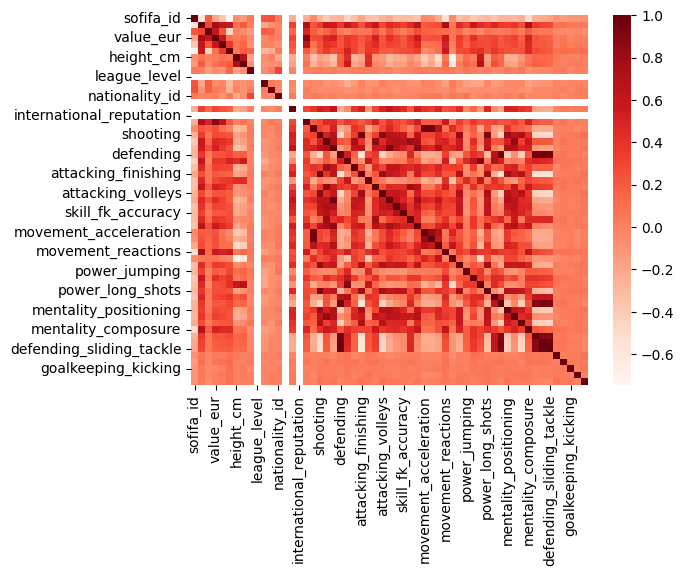

<Figure size 640x480 with 0 Axes>

In [26]:
sns.heatmap(df.corr(), cmap='Reds') # heat map for analysis
plt.figure()
corr = df.corr()
  
# Displaying dataframe as an heatmap 
# with diverging colourmap as coolwarm
corr.style.background_gradient(cmap ='coolwarm')

#df.head()

In [27]:
cor_matrix = df.corr().abs()
#print(cor_matrix)

In [28]:
cor_matrix = df.corr()['value_eur']
#cor_matrix

In [29]:
df_cor = cor_matrix[(cor_matrix >0.59) & (cor_matrix < 0.95)]
df_cor.sort_values(ascending=False)

release_clause_eur    0.877753
overall               0.760280
potential             0.619055
wage_eur              0.599599
Name: value_eur, dtype: float64

In [30]:
df_x = []
for col in df_cor.index:
    #print(col)
    df_x.append(col)
df_x

['overall', 'potential', 'wage_eur', 'release_clause_eur']

In [31]:
df_x = df[df_x]
#df_x

In [32]:
data_y = df[['value_eur']]
#data_y

In [33]:
scaler = StandardScaler()
# transform data
data_x = scaler.fit_transform(df_x)
data_x

array([[ 2.23191002,  1.0759848 ,  3.4025217 ,  2.10150762],
       [ 2.03527606,  0.86925589,  2.88885864,  2.73308934],
       [ 2.03527606,  0.86925589,  1.34786946,  3.55414558],
       ...,
       [-3.0772067 , -1.61149103, -0.83519854, -0.98503225],
       [-3.27384065, -3.26532231, -0.82235696, -1.01219027],
       [-3.27384065, -1.40476212, -0.70678277, -0.9490321 ]])

In [34]:
data_y_tran = scaler.fit_transform(data_y)

#data_y_tran

# **Train model**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y_tran, test_size = 0.3,random_state=15000,shuffle = True)

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
X_train.shape, y_train.shape

((960, 4), (960, 1))

In [37]:
y_pred = lm.predict(X_test)
lm.score(X_test,y_test)

print("Coefficient =", lm.coef_)
print('Coefficient of determination: %.2f (The best case is 1)' % r2_score(y_test, y_pred))
print('Root Mean squared error: %.2f' % (np.sqrt(mean_squared_error(y_test, y_pred))))
print('Mean Absolute error: %.2f' % (mean_absolute_error(y_test, y_pred)))

Coefficient = [[ 0.28263407  0.27610408 -0.00739772  0.55693866]]
Coefficient of determination: 0.86 (The best case is 1)
Root Mean squared error: 0.37
Mean Absolute error: 0.26


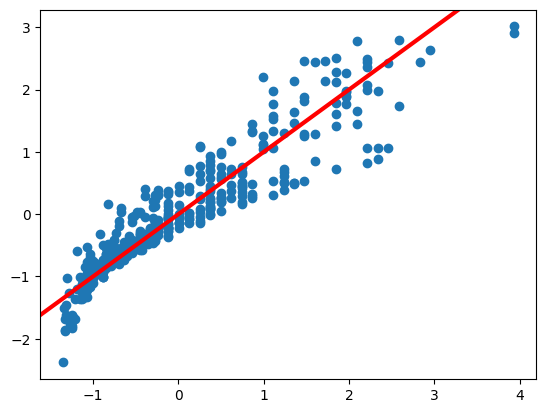

In [38]:
plt.scatter(y_test, y_pred)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints,  color='r', lw=3, scalex=False, scaley=False) #x=y
plt.show()

In [39]:
regressor = SVR(kernel = 'linear')
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
regressor.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [40]:
y_pred_svm = regressor.predict(X_test)
#y_pred_svm
#y_pred_svm = data_y_tran.inverse_transform(y_pred_svm) 

In [41]:
#print("Coefficient =", regressor.coef_)
print('Coefficient of determination: %.2f (The best case is 1)' % r2_score(y_test, y_pred_svm))
print('Root Mean squared error: %.2f' % (np.sqrt(mean_squared_error(y_test, y_pred_svm))))
print('Mean Absolute error: %.2f' % (mean_absolute_error(y_test, y_pred_svm)))

Coefficient of determination: 0.86 (The best case is 1)
Root Mean squared error: 0.38
Mean Absolute error: 0.26


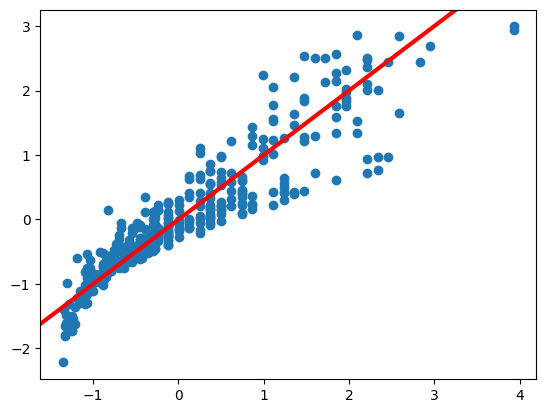

In [42]:
plt.scatter(y_test, y_pred_svm)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints,  color='r', lw=3, scalex=False, scaley=False) #x=y
plt.show()

ข้อมูลอยู่ใต้กราฟ = ค่าจริงมากกว่าค่าทำนาย


ข้อมูลเหนือกราฟ =  ค่าจริงน้อยกว่าที่ทำนาย

# **SAVE model**

In [43]:
# Save the model as a pickle in a file
joblib.dump(regressor, 'SVR_model.joblib')
joblib.dump(lm, 'L_model.joblib')

['L_model.joblib']